In [ ]:
from datetime import datetime
from getpass import getpass

rdm_url = 'https://rdm.example.com/'
idp_name_1 = 'GakuNin RDM IdP'
idp_username_1 = None
idp_password_1 = None
rdm_project_prefix = None
target_storage_name = None
target_storage_id = None
enable_52gb_file_upload = False
enable_1gb_file_upload = True
default_result_path = None
close_on_fail = False
transition_timeout = 10000
skip_failed_test = True
exclude_notebooks = []

In [13]:
if idp_username_1 is None:
    idp_username_1 = input(prompt=f'Username for {idp_name_1}')
if idp_password_1 is None:
    idp_password_1 = getpass(prompt=f'Password for {idp_username_1}@{idp_name_1}')
(len(idp_username_1), len(idp_password_1))

Username for GakuNin RDM IdP vr_yazawa
Password for vr_yazawa@GakuNin RDM IdP ········


(9, 20)

In [10]:
import tempfile

work_dir = tempfile.mkdtemp()
if default_result_path is None:
    default_result_path = work_dir
work_dir

'/tmp/tmpd3awonir'

In [7]:
assert rdm_project_prefix is not None
assert target_storage_name is not None
assert target_storage_id is not None

# GakuNinRDM 総合テスト [拡張ストレージ]

- サブシステム名: ログイン
- ページ/アドオン: トップページ
- 機能分類: ストレージ制御確認
- シナリオ名: *
- 用意するテストデータ: URL一覧、アカウント(既存ユーザー1: GRDM)

In [ ]:
from datetime import datetime
import os
import papermill as pm
import traceback
from scripts.papermillHelpers import gen_run_notebook

def make_result_dir(base_path):
    result_dir = os.path.join(base_path, 'notebooks')
    os.makedirs(result_dir, exist_ok=True)
    return result_dir

result_dir = make_result_dir(default_result_path)

run_notebook = gen_run_notebook(
    result_dir,
    transition_timeout,
    dict(
        rdm_url=rdm_url,
        idp_name_1=idp_name_1,
        idp_username_1=idp_username_1,
        idp_password_1=idp_password_1,
    ),
    skip_failed_test,
    exclude_notebooks,
)

result_notebooks = []
result_dir

## プロジェクトダッシュボードでの「ファイル基本操作」テストの実施

テスト「テスト手順-ストレージ共通-ファイル基本操作」をプロジェクトダッシュボードで実施する。

In [14]:
result_notebooks.append(run_notebook(
    'テスト手順-ストレージ共通-ファイル基本操作.ipynb',
    dict(
        enable_52gb_file_upload=False,
        target_storage_name=target_storage_name,
        target_file_view='project-dashboard',
        rdm_project_name=f'{rdm_project_prefix}-dashboard',
        enable_1gb_file_upload=enable_1gb_file_upload,
    ),
    f'-ファイル基本操作-プロジェクトダッシュボード-{target_storage_name}',
))
result_notebooks[-1]

Executing:   0%|          | 0/107 [00:00<?, ?cell/s]

'/tmp/tmpd3awonir/notebooks/テスト手順-ストレージ共通-ファイル基本操作-Dropbox-ファイル基本操作-プロジェクトダッシュボード.ipynb'

## ファイルタブでの「ファイル基本操作」テストの実施

テスト「テスト手順-ストレージ共通-ファイル基本操作」をファイルタブで実施する。

In [15]:
result_notebooks.append(run_notebook(
    'テスト手順-ストレージ共通-ファイル基本操作.ipynb',
    dict(
        enable_52gb_file_upload=False,
        target_storage_name=target_storage_name,
        target_file_view='file-tab',
        rdm_project_name=f'{rdm_project_prefix}-filetab',
        enable_1gb_file_upload=enable_1gb_file_upload,
    ),
    f'-ファイル基本操作-ファイルタブ-{target_storage_name}',
))
result_notebooks[-1]

Executing:   0%|          | 0/107 [00:00<?, ?cell/s]

'/tmp/tmpd3awonir/notebooks/テスト手順-ストレージ共通-ファイル基本操作-Dropbox-ファイル基本操作-ファイルタブ.ipynb'

## ストレージでの「Metadataアドオンの登録」テストの実施

テスト「テスト手順-ストレージ共通-Metadataアドオン」をファイルタブで実施する。

In [16]:
result_notebooks.append(run_notebook(
    'テスト手順-ストレージ共通-Metadataアドオン.ipynb',
    dict(
        target_storage_name=target_storage_name,
        target_storage_id=target_storage_id,
        rdm_project_name=f'{rdm_project_prefix}-metadata'
    ),
    f'-Metadataアドオン-{target_storage_name}',
))
result_notebooks[-1]

Executing:   0%|          | 0/183 [00:00<?, ?cell/s]

'/tmp/tmpd3awonir/notebooks/テスト手順-ストレージ共通-Metadataアドオン-Dropbox-Metadataアドオン.ipynb'

## ウェブブラウザの新規プライベートウィンドウでGRDMトップページを表示する

GRDMトップページが表示されること

In [17]:
import importlib
import pandas as pd

import scripts.playwright
importlib.reload(scripts.playwright)

from scripts.playwright import *
from scripts import grdm

await init_pw_context(close_on_fail=close_on_fail, last_path=default_result_path)

('20250404-011551', '/tmp/tmpx8o31_e8')

Start epoch: 1743729351.854148 seconds


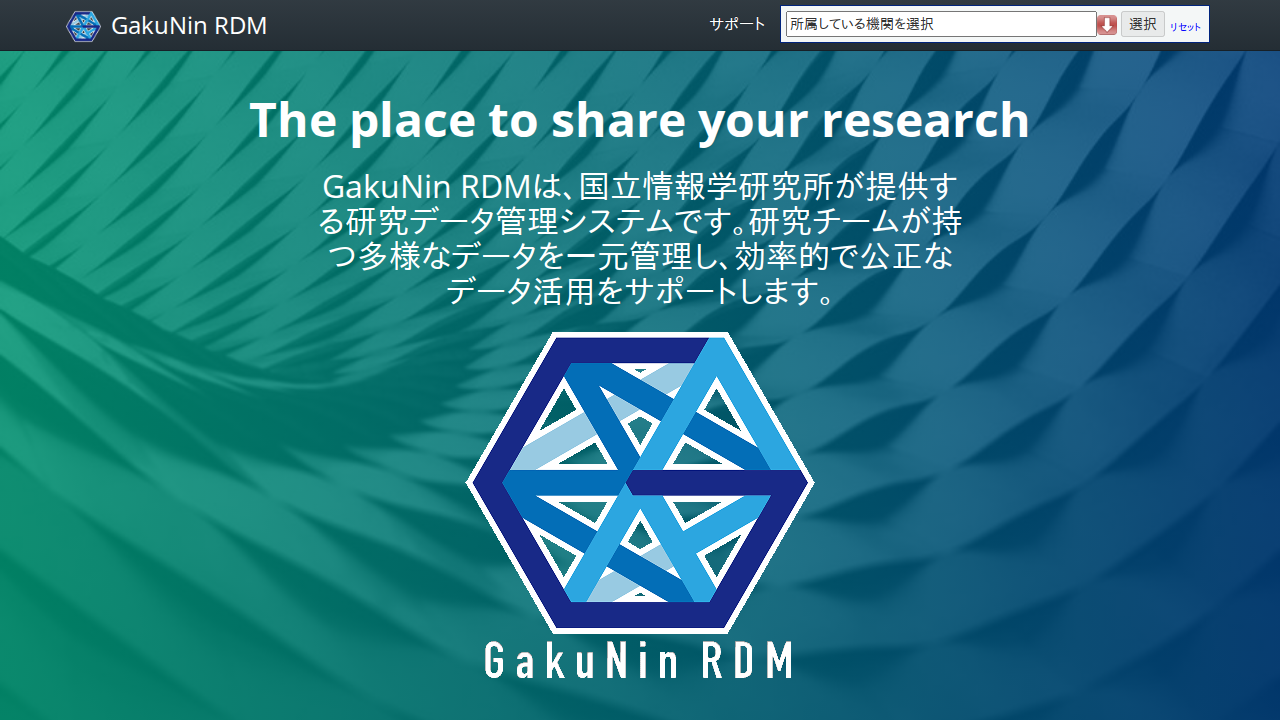

In [18]:
import time

async def _step(page):
    await page.goto(rdm_url)

    # 同意する ボタンが現れるまで待つ
    await expect(page.locator('//button[text() = "同意する"]')).to_be_visible(timeout=transition_timeout)

    # 同意する をクリック
    await page.locator('//button[text() = "同意する"]').click()

    # 同意する が表示されなくなったことを確認
    await expect(page.locator('//button[text() = "同意する"]')).to_have_count(0, timeout=500)

await run_pw(_step)

## ログイン情報を用いてGakuNin RDMにログインする

(IdPに関するログイン情報が与えられた場合、)
GakuNin Embeded DSのプルダウンを展開し、IdPリストから指定されたIdPを選択する。その後、アカウントのID/Passwordを入力して「Login」ボタンを押下する。

(IdPが指定されていない場合、)
CASのログイン操作を実施する。

Start epoch: 1744970588.3502991 seconds


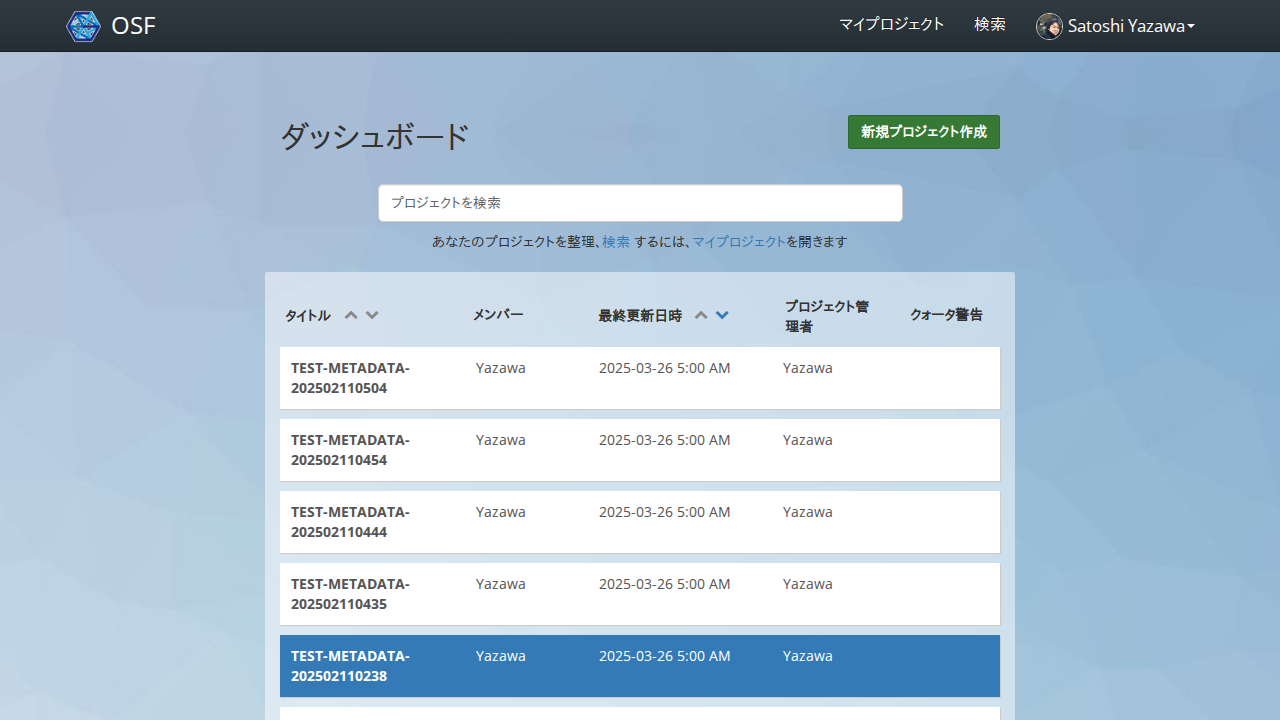

In [104]:
import scripts.grdm
importlib.reload(scripts.grdm)

async def _step(page):
    await scripts.grdm.login(
        page, idp_name_1, idp_username_1, idp_password_1, transition_timeout=transition_timeout
    )

    # GRDMのボタンが表示されることを確認
    await expect(page.locator('//*[text() = "プロジェクト管理者"]')).to_be_visible(timeout=transition_timeout)

await run_pw(_step)

## ユーザーメニューから「設定」を選択する


Start epoch: 1743729366.254842 seconds


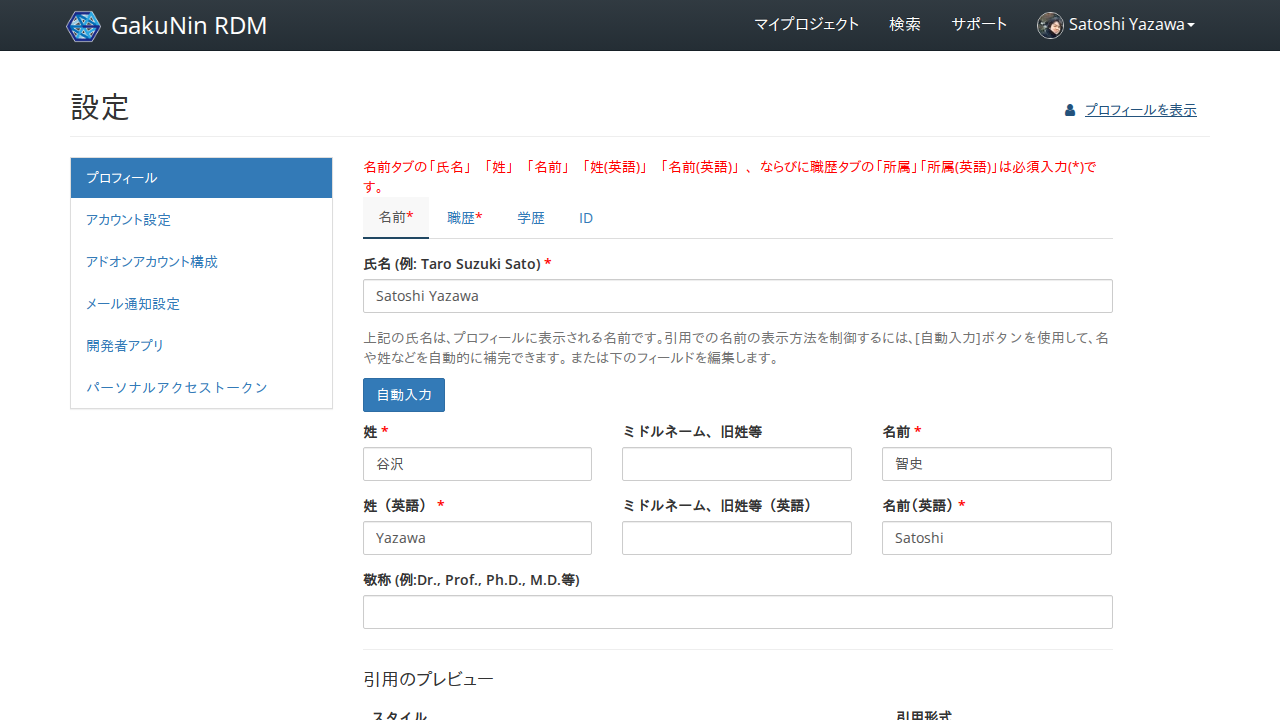

In [23]:
async def _step(page):
    await page.locator(f'//div[@class = "nav-profile-name"]').click()
    await page.locator('//*[@data-analytics-name="Settings"]').click()

    await expect(page.locator('//*[text() = "アドオンアカウント構成"]')).to_be_visible(timeout=transition_timeout)

await run_pw(_step)

## 「アドオンアカウント構成」を選択する


Start epoch: 1743729367.327086 seconds


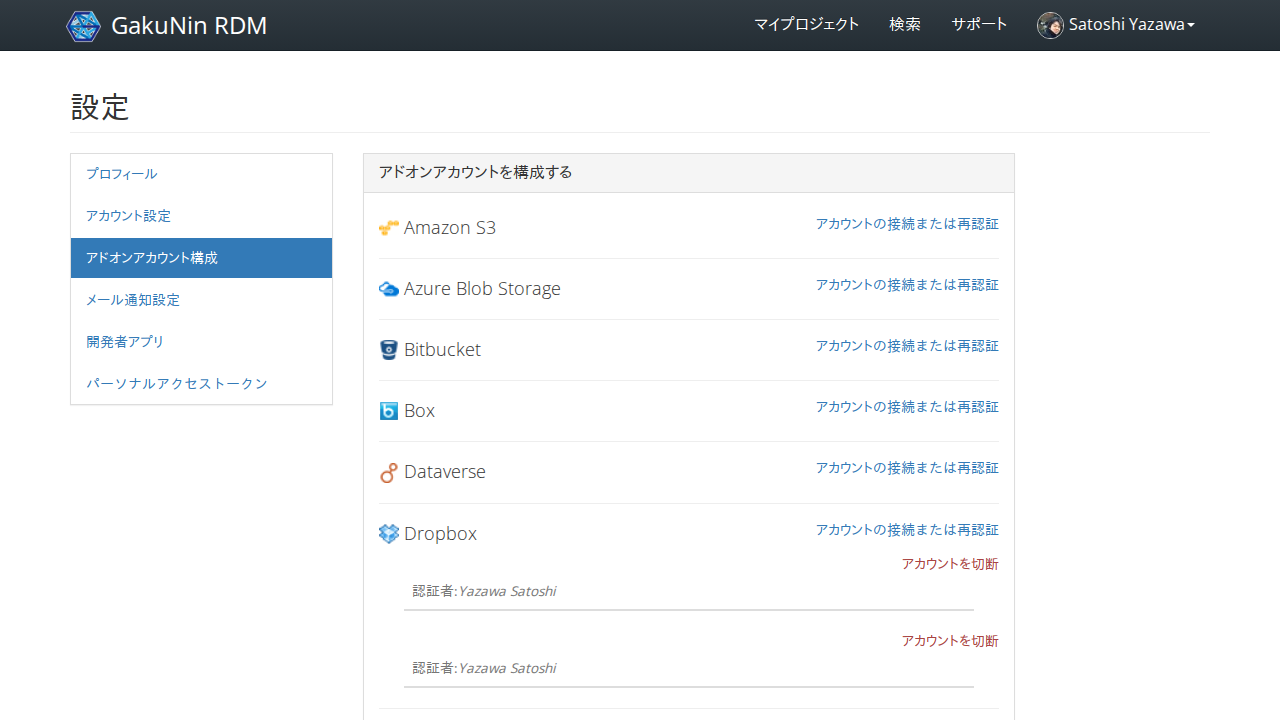

In [24]:
import traceback

async def _step(page):
    global has_connections
    await page.locator('//*[text() = "アドオンアカウント構成"]').click()
    await expect(page.locator(f'//*[@src="/static/addons/{target_storage_id}/comicon.png"]/../*[text() = "{target_storage_name}"]')).to_be_visible(timeout=transition_timeout)
    await expect(page.locator(f'//*[@src="/static/addons/{target_storage_id}/comicon.png"]/../..//*[text() = "アカウントを切断"]')).to_have_count(2, timeout=30000)

await run_pw(_step)

## 1つ目の「アカウントを切断」をクリックし、「Disconnect」をクリックする

Start epoch: 1743604871.8102565 seconds


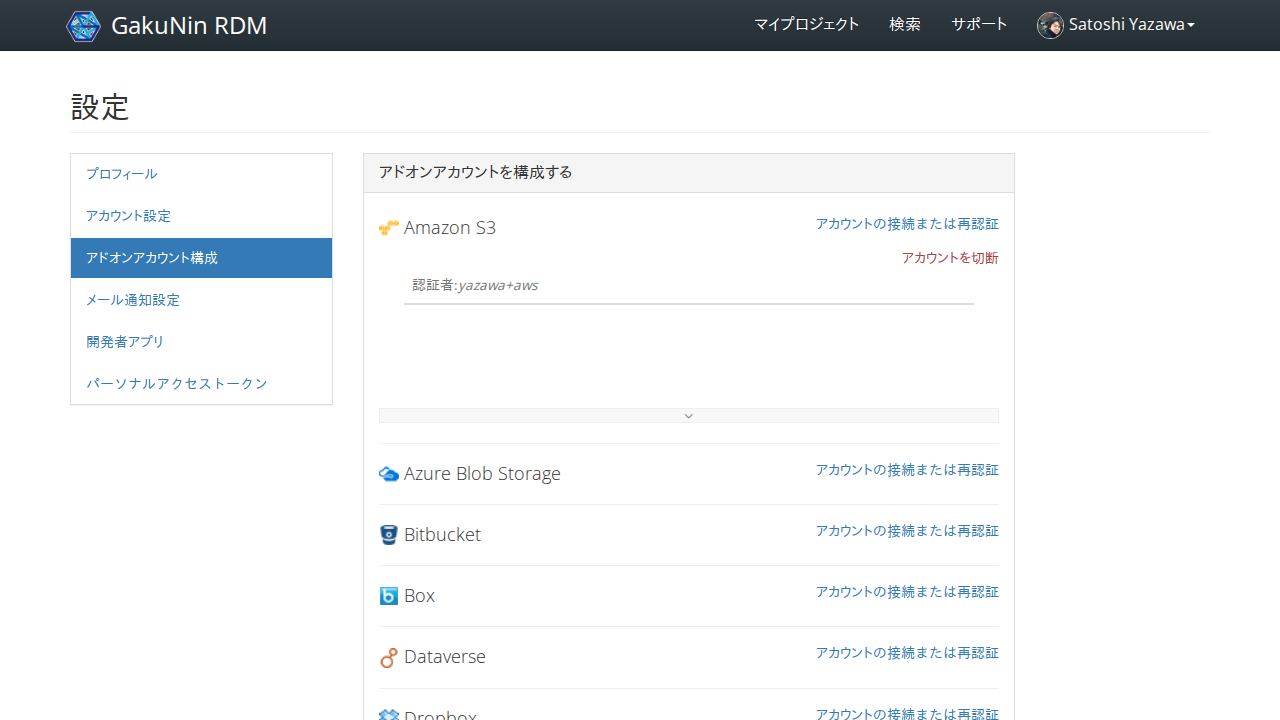

In [167]:
async def _step(page):
    await page.locator(f'//*[@src="/static/addons/{target_storage_id}/comicon.png"]/../..//*[text() = "アカウントを切断"][1]').click()
    await page.locator('.bootbox-confirm .btn-danger').click()
    await expect(page.locator(f'//*[@src="/static/addons/{target_storage_id}/comicon.png"]/../..//*[text() = "アカウントを切断"]')).to_have_count(1, timeout=transition_timeout)

await run_pw(_step)

## 2つ目の「アカウントを切断」をクリックし、「Disconnect」をクリックする

Start epoch: 1743604970.8387072 seconds


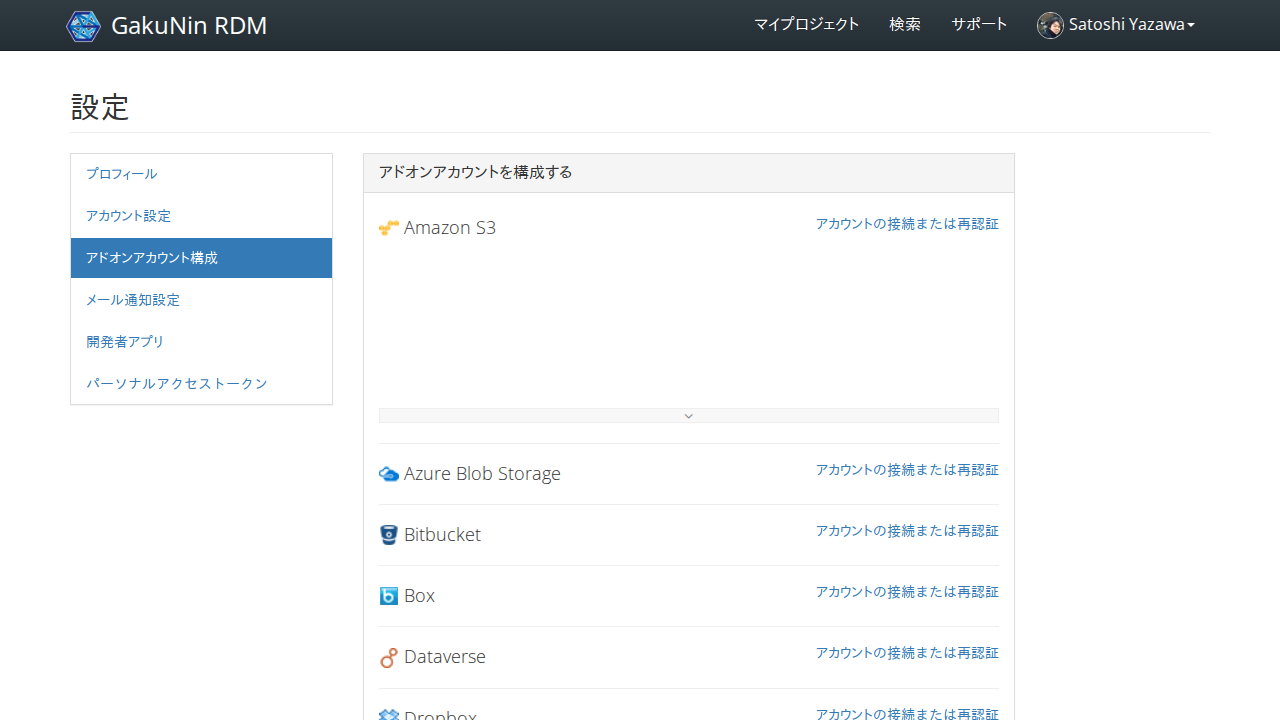

In [169]:
async def _step(page):
    await page.locator(f'//*[@src="/static/addons/{target_storage_id}/comicon.png"]/../..//*[text() = "アカウントを切断"][1]').click()
    await page.locator('.bootbox-confirm .btn-danger').click()
    await expect(page.locator(f'//*[@src="/static/addons/{target_storage_id}/comicon.png"]/../..//*[text() = "アカウントを切断"]')).to_have_count(0, timeout=transition_timeout)

await run_pw(_step)

終了処理を実施。

In [29]:
await finish_pw_context()

Video: /tmp/tmpd3awonir/video-1.webm
HAR: /tmp/tmpd3awonir/har.zip


In [30]:
!rm -fr {work_dir}